#### Import packages ...

In [1]:
import sys
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import networkx as nx

sys.path.append('../utils/')
sys.path.append('../libs/')
#from curvygraph import *
from utils import *

#### Set fonts for figures ...

In [2]:
%%capture
# some matplotlib configs to make labels pretty
rcPhysRev(fontsize=10)

#### Draw Figure ...
(This is Figure 7 in our paper.)

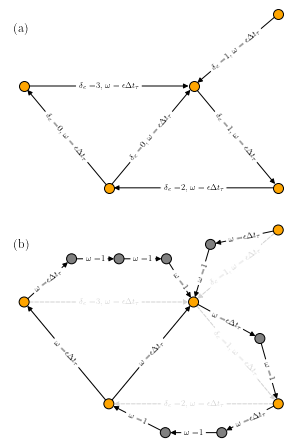

In [3]:
c = 0.5
s = np.array([0.2, 0.25])
alpha = 90*np.pi/360
pos1 = {0: np.array([0,0])*c+s,
        1: np.array([1,-np.sqrt(2)])*c+s,
        2: np.array([-1,-np.sqrt(2)])*c+s,
        3: np.array([-2,0])*c+s,
        4: np.array([np.cos(alpha)*np.sqrt(2),np.sin(alpha)*np.sqrt(2)])*c+s}

node_size = 100
fontsize=8
labelsize=12
plt.figure(figsize=(4,6))

ax = plt.subplot(211)
edge_list1 = [(0,1),(1,2),(2,0),(2,3),(3,0),(4,0)]
lags = [2,3,1,1,4,2]
edge_labels1 = {e: r'$\delta_e=$'+str(lags[i]-1)+r', $\omega=\epsilon\Delta t_\tau$'
                for i, e in enumerate(edge_list1)}
G1 = nx.DiGraph()
G1.add_edges_from(edge_list1)

#nx.draw(G1, pos1, node_size=node_size, node_color='orange')
nodes1 = nx.draw_networkx_nodes(G1, pos1, node_size=node_size, node_color='orange', linewidths=1)
nodes1.set_edgecolor('k')
nx.draw_networkx_edges(G1, pos1, node_size=node_size)
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=edge_labels1, font_size=fontsize)
plt.xlim([-0.9,0.8])
plt.ylim([-0.7,0.8])
#ax.axis('on')
plt.text(0.05, 0.9, '(a)', 
         horizontalalignment='center',
         verticalalignment='center', 
         fontsize=labelsize, transform=ax.transAxes)
ax.axis('off')


ax = plt.subplot(212)
edge_labels2 = {e: r'$\epsilon\theta\Delta t$' for e in edge_list1}
#nx.draw_networkx_nodes(G1, pos1, node_size=node_size, edge_color='grey', style='--')
collection = nx.draw_networkx_edges(G1, pos1, node_size=node_size, edge_color='lightgrey', edge_style='--')
for patch in collection:
    patch.set_linestyle('dashed')
    
    
G2 = nx.DiGraph()
edge_list2 = [(0,'h1'),('h1',1),
              (1,'h2'),('h2','h3'),('h3',2),
              (2,0),(2,3),
              (3,'h4'),('h4','h5'),('h5','h6'), ('h6', 0),
              (4,'h7'),('h7',0)
             ]

pos2 = {0: np.array([0,0])*c+s, #TODO
        1: np.array([1,-np.sqrt(2)])*c+s,
        2: np.array([-1,-np.sqrt(2)])*c+s,
        3: np.array([-2,0])*c+s,
        4: np.array([np.cos(alpha)*np.sqrt(2),np.sin(alpha)*np.sqrt(2)])*c+s
       }

alpha = -0.2
vec = pos2[1]-pos2[0]
#print(vec)
pos2['h1'] = pos2[0] + 1/2 * vec + np.array([1,-1])*vec[::-1]*alpha
alpha = -0.2
vec = pos2[2]-pos2[1]
pos2['h2'] = pos2[1] + 1/3 * vec + np.array([1,-1])*vec[::-1]*alpha
pos2['h3'] = pos2[1] + 2/3 * vec + np.array([1,-1])*vec[::-1]*alpha
alpha = -0.3
sx = np.array([0.03,0])
vec = pos2[0]-pos2[3]
pos2['h4'] = pos2[3] + 1/4 * vec + np.array([1,-1])*vec[::-1]*alpha + sx
pos2['h5'] = pos2[3] + 2/4 * vec + np.array([1,-1])*vec[::-1]*alpha + 2*sx
pos2['h6'] = pos2[3] + 3/4 * vec + np.array([1,-1])*vec[::-1]*alpha + 3*sx
alpha = 0.3
vec = pos2[0]-pos2[4]
pos2['h7'] = pos2[4] + 1/2* vec + np.array([1,-1])*vec[::-1]*alpha

G2.add_edges_from(edge_list2)
node_colors = [('orange' if isinstance(n, int) else 'grey') for n in G2.nodes()]
nodes2 = nx.draw_networkx_nodes(G2, pos2, node_size=node_size, node_color=node_colors, edge_color='black', linewidths=1)
nodes2.set_edgecolor('k')
nx.draw_networkx_edges(G2, pos2, node_size=node_size, zorder=20)
#nx.draw_networkx_edge_labels(G2, pos2, edge_labels=edge_labels2, font_size=fontsize)

edge_labels1r = {e: ('' if e in G2.edges() else edge_labels1[e])
                for i, e in enumerate(edge_labels1.keys())}
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=edge_labels1r, font_size=fontsize, font_color='lightgrey')
w = [1,0,1,0,0,1,1,1,0,0,0,1,0]
edge_labels2 = {e: r'$\omega=$'+(r'$\epsilon\Delta t_\tau$' if w[i] else str(1)) for i, e in enumerate(edge_list2)}
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=edge_labels2, font_size=fontsize)

plt.xlim([-0.9,0.8])
plt.ylim([-0.7,0.8])
plt.text(0.05, 0.9, '(b)', 
         horizontalalignment='center',
         verticalalignment='center', 
         fontsize=labelsize, transform=ax.transAxes)
ax.axis('off')
plt.subplots_adjust(hspace=0, left=0, bottom=0, right=1, top=1)
plt.savefig('../figures/figure_unobservable_nodes.pdf')